In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

divar_dataset = pd.read_csv('/content/drive/MyDrive/Copy of Divar.csv')

Mounted at /content/drive


/tmp/ipython-input-1040478026.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_dataset = pd.read_csv('/content/drive/MyDrive/Copy of Divar.csv')


In [10]:
df = divar_dataset.copy()

In [3]:
df['construction_year'].unique()

array([nan, '۱۳۸۴', '۱۴۰۱', '۱۴۰۰', '۱۴۰۳', '۱۳۸۹', '۱۳۹۵', '۱۳۹۳',
       '۱۳۹۶', '۱۳۸۷', '۱۳۸۵', '۱۳۹۰', '۱۳۹۸', '۱۴۰۲', '۱۳۸۸',
       'قبل از ۱۳۷۰', '۱۳۹۲', '۱۳۸۳', '۱۳۹۴', '۱۳۹۱', '۱۳۸۰', '۱۳۷۸',
       '۱۳۷۵', '۱۳۹۷', '۱۳۹۹', '۱۳۸۲', '۱۳۸۶', '۱۳۷۹', '۱۳۷۲', '۱۳۷۴',
       '۱۳۷۶', '۱۳۷۷', '۱۳۷۱', '۱۳۸۱', '۱۳۷۳'], dtype=object)

In [4]:
old_houses = ['۱۳۸۴','۱۳۸۹', '۱۳۹۵', '۱۳۹۳','۱۳۸۷', '۱۳۸۵', '۱۳۹۰', '۱۳۸۸', 'قبل از ۱۳۷۰', '۱۳۹۲', '۱۳۸۳', '۱۳۹۴', '۱۳۹۱', '۱۳۸۰', '۱۳۷۸','۱۳۷۵', '۱۳۸۲', '۱۳۸۶', '۱۳۷۹', '۱۳۷۲', '۱۳۷۴','۱۳۷۶', '۱۳۷۷', '۱۳۷۱', '۱۳۸۱', '۱۳۷۳']

new_houses = [ '۱۴۰۱', '۱۴۰۰', '۱۴۰۳','۱۳۹۶','۱۳۹۸','۱۴۰۲', '۱۳۹۷', '۱۳۹۹']

In [5]:
old_houses_df = df.loc[df['construction_year'].isin(old_houses) , ['construction_year','building_size']].reset_index(drop=True)

new_houses_df = df.loc[df['construction_year'].isin(new_houses) , ['construction_year','building_size']].dropna().reset_index(drop=True)

In [6]:
x_old = old_houses_df['building_size'].mean()
s_old = old_houses_df['building_size'].std()
n_old = len(old_houses_df['building_size'])

x_new = new_houses_df['building_size'].mean()
s_new = new_houses_df['building_size'].std()
n_new = len(new_houses_df['building_size'])

print(f"x_new: {x_new}")
print(f"s_new: {s_new}")
print(f"x_old: {x_old}")
print(f"s_old: {s_old}")
print(f"n_old: {n_old}")
print(f"n_new: {n_new}")

x_new: 3278.3317794782024
s_new: 120228.69059926462
x_old: 2758.6709217313733
s_old: 111650.79245764857
n_old: 412528
n_new: 403298


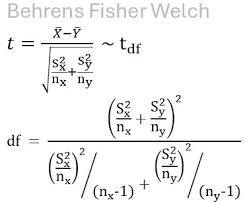

In [9]:
import scipy.stats as st

# 2

'''
 چون واریانس ها و اندازه نمونه ها یکسان نیست از روش ولش میریم تا نتایج قابل اعتماد باشند

Welch-satterhwaite

'''

# آماره t (Welch)
num = x_old - x_new
den = np.sqrt((s_old**2)/n_old + (s_new**2)/n_new)
t_stat = num/den

# درجات آزادی (Welch-Satterthwaite)
v_num = ((s_old**2)/n_old + (s_new**2)/n_new)**2
v_den = ((s_old**2)/n_old)**2/(n_old-1) + ((s_new**2)/n_new)**2/(n_new-1)
degf = v_num / v_den

# p-value برای آزمون یک‌طرفه (H_A: mu1 > mu2)
p_one_sided = 1 - st.t.cdf(t_stat, df)

print("t =", t_stat)
print("df ≈", degf)
print("p (one-sided) =", p_one_sided)

if p_one_sided < 0.05 :
  print('شواهد برای رد فرض صفر کافی و تایید دلباز تر بودن خانه های قدیمی')
else:
  print('شواهد کافی برای رد فرض صفر وجود ندارد در نتیجه خانه های قدیمی دلباز تر نیستند')

t = -2.0218561796631973
df ≈ 808305.1052064584
p (one-sided) = 0.9784042296465324
شواهد کافی برای رد فرض صفر وجود ندارد در نتیجه خانه های قدیمی دلباز تر نیستند


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [19]:
df_clean = df.dropna(subset=['has_pool', 'has_jacuzzi', 'has_sauna', 'has_barbecue'])

amenity_columns = ['has_pool', 'has_jacuzzi', 'has_sauna', 'has_barbecue']

df_non_lux = df_clean[~df_clean[amenity_columns].any(axis=1)]

df_lux = df_clean[df_clean[amenity_columns].any(axis=1)]

In [31]:
lux = df_lux[df_lux['price_value'] > 0]['price_value']
nonlux = df_non_lux[df_non_lux['price_value'] > 0]['price_value']

In [29]:
# برای اینکه ببینیم توزیع نرمالی دارند یا نه
# اگر از 0.05 کوچکتر باشه فرض صفر ازمون شپیرو رد میشه و نشان دهنده نرمال نبودن توزیع داده های ماست
from scipy.stats import shapiro

stat_lux, p_lux = shapiro(df_lux['price_value'])
stat_nonlux, p_nonlux = shapiro(df_non_lux['price_value'])

print(f"لوکس: p={p_lux}")
print(f"غیرلوکس: p={p_nonlux}")

لوکس: p=2.539593819054811e-86
غیرلوکس: p=2.0886294517343223e-128


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15665.
  res = hypotest_fun_out(*samples, **kwds)


In [28]:
print("لوکس:")
print(df_lux['price_value'].describe())
print("\nغیرلوکس:")
print(df_non_lux['price_value'].describe())

print("\nتعداد رکوردهای لوکس:", df_lux['price_value'].shape[0])
print("تعداد رکوردهای غیرلوکس:", df_non_lux['price_value'].shape[0])


لوکس:
count    3.520000e+03
mean     1.753055e+10
std      3.879488e+11
min      1.000000e+00
25%      1.900000e+09
50%      3.400000e+09
75%      7.300000e+09
max      2.000000e+13
Name: price_value, dtype: float64

غیرلوکس:
count    1.566500e+04
mean     1.543494e+10
std      8.171339e+11
min      1.000000e+00
25%      1.500000e+09
50%      2.700000e+09
75%      5.000000e+09
max      1.000000e+14
Name: price_value, dtype: float64

تعداد رکوردهای لوکس: 3520
تعداد رکوردهای غیرلوکس: 15665


In [32]:
from scipy.stats import mannwhitneyu
import numpy as np


# Mann-Whitney U test
stat, p = mannwhitneyu(lux, nonlux, alternative='two-sided')
print(f"Mann-Whitney U test: U={stat}, p-value={p:.6f}")

# مقایسه آماری
print(f"لوکس: میانگین={lux.mean():.0f}, میانه={lux.median():.0f}")
print(f"غیرلوکس: میانگین={nonlux.mean():.0f}, میانه={nonlux.median():.0f}")

Mann-Whitney U test: U=31635292.0, p-value=0.000000
لوکس: میانگین=17530548829, میانه=3400000000
غیرلوکس: میانگین=15434942708, میانه=2700000000
